In [796]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from summarytools import dfSummary
import warnings
warnings.filterwarnings("ignore")


# Rendere il dataset riproducibile fissando un seed
np.random.seed(42)

# Ricreazione del dataset con valori riproducibili
data = {
    'Feature_A': [np.random.choice([np.random.randint(10, 100), None, ' 2 4']) for _ in range(15)],
    'Feature_B': [np.random.choice([np.random.randint(20, 200), None, '1 0 5']) for _ in range(15)],
    'Feature_C': [np.random.choice([np.random.randint(30, 300), None, '5 6']) for _ in range(15)],
    'Feature_D': [np.random.choice([np.random.randint(40, 400), None, ' 8 0']) for _ in range(15)],
    'Feature_E': [np.random.choice([np.random.randint(50, 500), None, '1 2 0']) for _ in range(15)],
    'Outcome': [np.random.randint(0, 100) for _ in range(15)]
}

# Creazione del DataFrame con un seed fisso
df = pd.DataFrame(data)

# Aggiungere una colonna categoriale con 3 valori univoci
df['Category'] = np.random.choice(['Category_1', 'Category_2', 'Category_3'], size=len(df))

# Aggiungere tre colonne con valori "sporchi" da pulire

# Colonna con valori numerici misti a stringhe
df['Feature_F'] = np.random.choice(['100', '200', '300', '400', 'abc', '10x0', '30 0', None], size=len(df))

# Colonna con categorie simili ma scritte in modo diverso
df['Feature_G'] = np.random.choice(['Yes', 'No', 'YES', 'no', 'Y', 'N', None], size=len(df))

# Colonna con percentuali con simboli sporchi
df['Feature_H'] = np.random.choice(['10%', '20%', '30%', '40%', '50%%', None, '30%% '], size=len(df))

# Colonna categorica per indicare il tipo di cliente
df['Customer_Type'] = np.random.choice(['New', 'Returning', 'VIP'], size=len(df))

# Colonna categorica per la regione geografica
df['Region'] = np.random.choice(['North', 'South', 'East', 'West'], size=len(df))

# Colonna categorica per il livello di soddisfazione
df['Satisfaction_Level'] = np.random.choice(['Low', 'Medium', 'High'], size=len(df))


## data cleaning

In [797]:
df.columns

Index(['Feature_A', 'Feature_B', 'Feature_C', 'Feature_D', 'Feature_E',
       'Outcome', 'Category', 'Feature_F', 'Feature_G', 'Feature_H',
       'Customer_Type', 'Region', 'Satisfaction_Level'],
      dtype='object')

In [798]:
df = df[['Feature_A', 'Feature_B', 'Feature_C', 'Feature_D', 'Feature_E', 'Category', 'Feature_F', 'Feature_G', 'Feature_H', 'Customer_Type', 'Region', 'Satisfaction_Level', 'Outcome']]

In [799]:
df

,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E,Category,Feature_F,Feature_G,Feature_H,Customer_Type,Region,Satisfaction_Level,Outcome
0,61,1 0 5,5 6,80,None,Category_1,10x0,No,20%,New,West,High,22
1,2 4,1 0 5,None,54,84,Category_1,100,no,30%,VIP,South,High,14
2,81,None,None,104,276,Category_2,400,None,10%,Returning,South,High,42
3,2 4,1 0 5,None,366,None,Category_2,abc,YES,50%%,Returning,South,Medium,28
4,2 4,83,None,383,180,Category_2,100,N,10%,New,East,High,35
5,2 4,150,None,8 0,None,Category_3,300,Yes,10%,Returning,East,High,12
6,97,1 0 5,None,8 0,None,Category_2,30 0,no,30%,Returning,West,High,31
7,2 4,40,None,8 0,1 2 0,Category_3,10x0,Yes,10%,VIP,West,High,70
8,31,None,None,8 0,1 2 0,Category_1,None,N,20%,VIP,North,Low,58
9,None,151,5 6,None,None,Category_3,300,Yes,20%,VIP,North,Low,85


In [800]:
colonne_dataset = [colonna for colonna in df.drop("Outcome", axis=1).columns]

In [801]:
for colonna in colonne_dataset:
    df[colonna] = df[colonna].apply(lambda x: str(x).replace(" ", "") if isinstance(x, str) else x)

In [802]:
df 

,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E,Category,Feature_F,Feature_G,Feature_H,Customer_Type,Region,Satisfaction_Level,Outcome
0,61,105,56,80,None,Category_1,10x0,No,20%,New,West,High,22
1,24,105,None,54,84,Category_1,100,no,30%,VIP,South,High,14
2,81,None,None,104,276,Category_2,400,None,10%,Returning,South,High,42
3,24,105,None,366,None,Category_2,abc,YES,50%%,Returning,South,Medium,28
4,24,83,None,383,180,Category_2,100,N,10%,New,East,High,35
5,24,150,None,80,None,Category_3,300,Yes,10%,Returning,East,High,12
6,97,105,None,80,None,Category_2,300,no,30%,Returning,West,High,31
7,24,40,None,80,120,Category_3,10x0,Yes,10%,VIP,West,High,70
8,31,None,None,80,120,Category_1,None,N,20%,VIP,North,Low,58
9,None,151,56,None,None,Category_3,300,Yes,20%,VIP,North,Low,85


In [803]:
df["Feature_F"] = df["Feature_F"].apply(lambda x: x.replace("10x0", "100") if isinstance(x, str) and x == "10x0" else x)

In [804]:
df

,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E,Category,Feature_F,Feature_G,Feature_H,Customer_Type,Region,Satisfaction_Level,Outcome
0,61,105,56,80,None,Category_1,100,No,20%,New,West,High,22
1,24,105,None,54,84,Category_1,100,no,30%,VIP,South,High,14
2,81,None,None,104,276,Category_2,400,None,10%,Returning,South,High,42
3,24,105,None,366,None,Category_2,abc,YES,50%%,Returning,South,Medium,28
4,24,83,None,383,180,Category_2,100,N,10%,New,East,High,35
5,24,150,None,80,None,Category_3,300,Yes,10%,Returning,East,High,12
6,97,105,None,80,None,Category_2,300,no,30%,Returning,West,High,31
7,24,40,None,80,120,Category_3,100,Yes,10%,VIP,West,High,70
8,31,None,None,80,120,Category_1,None,N,20%,VIP,North,Low,58
9,None,151,56,None,None,Category_3,300,Yes,20%,VIP,North,Low,85


In [805]:
df["Feature_H"] = df["Feature_H"].apply(lambda x: x[:-1] if isinstance(x, str) and x[-2:] == "%%" else x)

In [806]:
df 

,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E,Category,Feature_F,Feature_G,Feature_H,Customer_Type,Region,Satisfaction_Level,Outcome
0,61,105,56,80,None,Category_1,100,No,20%,New,West,High,22
1,24,105,None,54,84,Category_1,100,no,30%,VIP,South,High,14
2,81,None,None,104,276,Category_2,400,None,10%,Returning,South,High,42
3,24,105,None,366,None,Category_2,abc,YES,50%,Returning,South,Medium,28
4,24,83,None,383,180,Category_2,100,N,10%,New,East,High,35
5,24,150,None,80,None,Category_3,300,Yes,10%,Returning,East,High,12
6,97,105,None,80,None,Category_2,300,no,30%,Returning,West,High,31
7,24,40,None,80,120,Category_3,100,Yes,10%,VIP,West,High,70
8,31,None,None,80,120,Category_1,None,N,20%,VIP,North,Low,58
9,None,151,56,None,None,Category_3,300,Yes,20%,VIP,North,Low,85


In [807]:
df["Feature_F"] = df["Feature_F"].replace("abc", np.nan)

In [808]:
df

,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E,Category,Feature_F,Feature_G,Feature_H,Customer_Type,Region,Satisfaction_Level,Outcome
0,61,105,56,80,None,Category_1,100,No,20%,New,West,High,22
1,24,105,None,54,84,Category_1,100,no,30%,VIP,South,High,14
2,81,None,None,104,276,Category_2,400,None,10%,Returning,South,High,42
3,24,105,None,366,None,Category_2,NaN,YES,50%,Returning,South,Medium,28
4,24,83,None,383,180,Category_2,100,N,10%,New,East,High,35
5,24,150,None,80,None,Category_3,300,Yes,10%,Returning,East,High,12
6,97,105,None,80,None,Category_2,300,no,30%,Returning,West,High,31
7,24,40,None,80,120,Category_3,100,Yes,10%,VIP,West,High,70
8,31,None,None,80,120,Category_1,None,N,20%,VIP,North,Low,58
9,None,151,56,None,None,Category_3,300,Yes,20%,VIP,North,Low,85


In [809]:
df["Feature_G"] = df["Feature_G"].apply(lambda x: "no" if isinstance(x, str) and x == "N" else ("yes" if isinstance(x, str) and x == "YES" else x))

In [810]:
df

,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E,Category,Feature_F,Feature_G,Feature_H,Customer_Type,Region,Satisfaction_Level,Outcome
0,61,105,56,80,None,Category_1,100,No,20%,New,West,High,22
1,24,105,None,54,84,Category_1,100,no,30%,VIP,South,High,14
2,81,None,None,104,276,Category_2,400,None,10%,Returning,South,High,42
3,24,105,None,366,None,Category_2,NaN,yes,50%,Returning,South,Medium,28
4,24,83,None,383,180,Category_2,100,no,10%,New,East,High,35
5,24,150,None,80,None,Category_3,300,Yes,10%,Returning,East,High,12
6,97,105,None,80,None,Category_2,300,no,30%,Returning,West,High,31
7,24,40,None,80,120,Category_3,100,Yes,10%,VIP,West,High,70
8,31,None,None,80,120,Category_1,None,no,20%,VIP,North,Low,58
9,None,151,56,None,None,Category_3,300,Yes,20%,VIP,North,Low,85


In [811]:
df["Feature_H"] = df["Feature_H"].apply(lambda x: float(x[:-1])/100 if isinstance(x,str) else x)

In [812]:
df

,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E,Category,Feature_F,Feature_G,Feature_H,Customer_Type,Region,Satisfaction_Level,Outcome
0,61,105,56,80,None,Category_1,100,No,0.2,New,West,High,22
1,24,105,None,54,84,Category_1,100,no,0.3,VIP,South,High,14
2,81,None,None,104,276,Category_2,400,None,0.1,Returning,South,High,42
3,24,105,None,366,None,Category_2,NaN,yes,0.5,Returning,South,Medium,28
4,24,83,None,383,180,Category_2,100,no,0.1,New,East,High,35
5,24,150,None,80,None,Category_3,300,Yes,0.1,Returning,East,High,12
6,97,105,None,80,None,Category_2,300,no,0.3,Returning,West,High,31
7,24,40,None,80,120,Category_3,100,Yes,0.1,VIP,West,High,70
8,31,None,None,80,120,Category_1,None,no,0.2,VIP,North,Low,58
9,None,151,56,None,None,Category_3,300,Yes,0.2,VIP,North,Low,85


In [813]:
colonne_numeriche = ['Feature_A', 'Feature_B', 'Feature_C', 'Feature_D', 'Feature_E', 'Feature_F', "Feature_H"]

In [814]:
df[colonne_numeriche] = df[colonne_numeriche].astype(float) 

<Axes: >

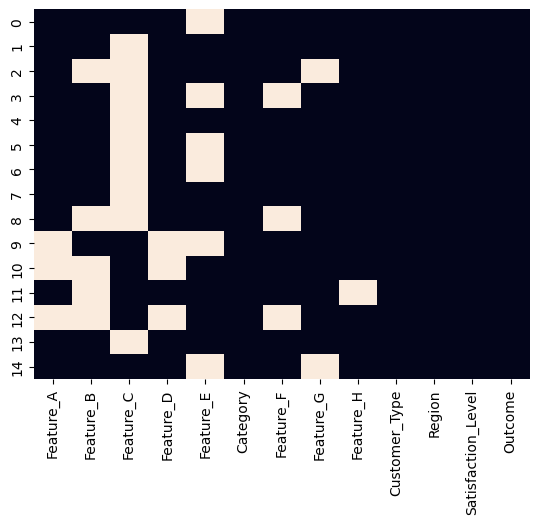

In [815]:
sns.heatmap(df.isna(), cbar=False)

In [816]:
df.columns

Index(['Feature_A', 'Feature_B', 'Feature_C', 'Feature_D', 'Feature_E',
       'Category', 'Feature_F', 'Feature_G', 'Feature_H', 'Customer_Type',
       'Region', 'Satisfaction_Level', 'Outcome'],
      dtype='object')

In [817]:
colonne_nun  = ['Feature_A', 'Feature_B', 'Feature_C', 'Feature_D', 'Feature_E','Category', 'Feature_F', 'Feature_G', 'Feature_H']

In [818]:
df[colonne_nun] = df[colonne_nun].interpolate()

In [819]:
df

,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E,Category,Feature_F,Feature_G,Feature_H,Customer_Type,Region,Satisfaction_Level,Outcome
0,61.0,105.0,56.0,80.0,NaN,Category_1,100.0,No,0.20,New,West,High,22
1,24.0,105.0,56.0,54.0,84.0,Category_1,100.0,no,0.30,VIP,South,High,14
2,81.0,105.0,56.0,104.0,276.0,Category_2,400.0,None,0.10,Returning,South,High,42
3,24.0,105.0,56.0,366.0,228.0,Category_2,250.0,yes,0.50,Returning,South,Medium,28
4,24.0,83.0,56.0,383.0,180.0,Category_2,100.0,no,0.10,New,East,High,35
5,24.0,150.0,56.0,80.0,160.0,Category_3,300.0,Yes,0.10,Returning,East,High,12
6,97.0,105.0,56.0,80.0,140.0,Category_2,300.0,no,0.30,Returning,West,High,31
7,24.0,40.0,56.0,80.0,120.0,Category_3,100.0,Yes,0.10,VIP,West,High,70
8,31.0,95.5,56.0,80.0,120.0,Category_1,200.0,no,0.20,VIP,North,Low,58
9,45.0,151.0,56.0,80.0,105.5,Category_3,300.0,Yes,0.20,VIP,North,Low,85


<Axes: >

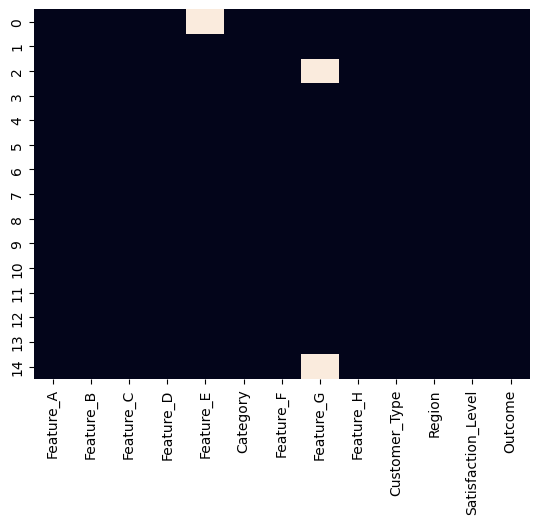

In [820]:
sns.heatmap(df.isna(), cbar=False)

In [821]:
df["Feature_E"] = df["Feature_E"].fillna(df["Feature_E"].median())

In [822]:
df["Feature_G"] = df["Feature_G"].fillna(df["Feature_G"].mode()[0])

In [823]:
df

,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E,Category,Feature_F,Feature_G,Feature_H,Customer_Type,Region,Satisfaction_Level,Outcome
0,61.0,105.0,56.0,80.0,130.0,Category_1,100.0,No,0.20,New,West,High,22
1,24.0,105.0,56.0,54.0,84.0,Category_1,100.0,no,0.30,VIP,South,High,14
2,81.0,105.0,56.0,104.0,276.0,Category_2,400.0,no,0.10,Returning,South,High,42
3,24.0,105.0,56.0,366.0,228.0,Category_2,250.0,yes,0.50,Returning,South,Medium,28
4,24.0,83.0,56.0,383.0,180.0,Category_2,100.0,no,0.10,New,East,High,35
5,24.0,150.0,56.0,80.0,160.0,Category_3,300.0,Yes,0.10,Returning,East,High,12
6,97.0,105.0,56.0,80.0,140.0,Category_2,300.0,no,0.30,Returning,West,High,31
7,24.0,40.0,56.0,80.0,120.0,Category_3,100.0,Yes,0.10,VIP,West,High,70
8,31.0,95.5,56.0,80.0,120.0,Category_1,200.0,no,0.20,VIP,North,Low,58
9,45.0,151.0,56.0,80.0,105.5,Category_3,300.0,Yes,0.20,VIP,North,Low,85


<Axes: >

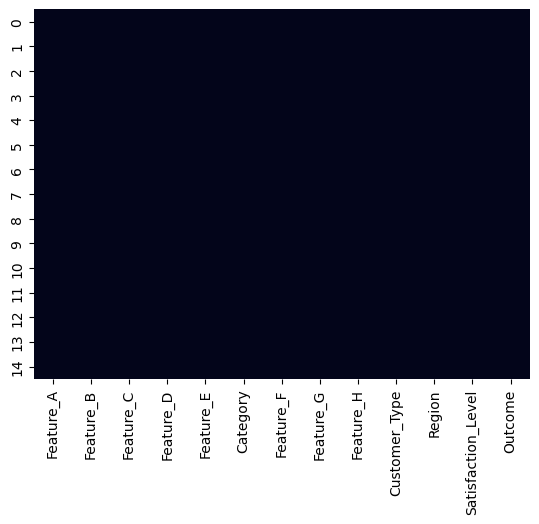

In [824]:
sns.heatmap(df.isna(), cbar=False)

In [825]:
df["costante"] = 1

In [826]:
costanti = [i for i in df.columns if df[i].nunique() == 1]

costanti

['costante']

In [827]:
df

,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E,Category,Feature_F,Feature_G,Feature_H,Customer_Type,Region,Satisfaction_Level,Outcome,costante
0,61.0,105.0,56.0,80.0,130.0,Category_1,100.0,No,0.20,New,West,High,22,1
1,24.0,105.0,56.0,54.0,84.0,Category_1,100.0,no,0.30,VIP,South,High,14,1
2,81.0,105.0,56.0,104.0,276.0,Category_2,400.0,no,0.10,Returning,South,High,42,1
3,24.0,105.0,56.0,366.0,228.0,Category_2,250.0,yes,0.50,Returning,South,Medium,28,1
4,24.0,83.0,56.0,383.0,180.0,Category_2,100.0,no,0.10,New,East,High,35,1
5,24.0,150.0,56.0,80.0,160.0,Category_3,300.0,Yes,0.10,Returning,East,High,12,1
6,97.0,105.0,56.0,80.0,140.0,Category_2,300.0,no,0.30,Returning,West,High,31,1
7,24.0,40.0,56.0,80.0,120.0,Category_3,100.0,Yes,0.10,VIP,West,High,70,1
8,31.0,95.5,56.0,80.0,120.0,Category_1,200.0,no,0.20,VIP,North,Low,58,1
9,45.0,151.0,56.0,80.0,105.5,Category_3,300.0,Yes,0.20,VIP,North,Low,85,1


In [828]:
df = df.drop("costante", axis=1)

In [829]:
df

,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E,Category,Feature_F,Feature_G,Feature_H,Customer_Type,Region,Satisfaction_Level,Outcome
0,61.0,105.0,56.0,80.0,130.0,Category_1,100.0,No,0.20,New,West,High,22
1,24.0,105.0,56.0,54.0,84.0,Category_1,100.0,no,0.30,VIP,South,High,14
2,81.0,105.0,56.0,104.0,276.0,Category_2,400.0,no,0.10,Returning,South,High,42
3,24.0,105.0,56.0,366.0,228.0,Category_2,250.0,yes,0.50,Returning,South,Medium,28
4,24.0,83.0,56.0,383.0,180.0,Category_2,100.0,no,0.10,New,East,High,35
5,24.0,150.0,56.0,80.0,160.0,Category_3,300.0,Yes,0.10,Returning,East,High,12
6,97.0,105.0,56.0,80.0,140.0,Category_2,300.0,no,0.30,Returning,West,High,31
7,24.0,40.0,56.0,80.0,120.0,Category_3,100.0,Yes,0.10,VIP,West,High,70
8,31.0,95.5,56.0,80.0,120.0,Category_1,200.0,no,0.20,VIP,North,Low,58
9,45.0,151.0,56.0,80.0,105.5,Category_3,300.0,Yes,0.20,VIP,North,Low,85


## eda

In [830]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Feature_A           15 non-null     float64
 1   Feature_B           15 non-null     float64
 2   Feature_C           15 non-null     float64
 3   Feature_D           15 non-null     float64
 4   Feature_E           15 non-null     float64
 5   Category            15 non-null     object 
 6   Feature_F           15 non-null     float64
 7   Feature_G           15 non-null     object 
 8   Feature_H           15 non-null     float64
 9   Customer_Type       15 non-null     object 
 10  Region              15 non-null     object 
 11  Satisfaction_Level  15 non-null     object 
 12  Outcome             15 non-null     int64  
dtypes: float64(7), int64(1), object(5)
memory usage: 1.7+ KB


In [831]:
df

,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E,Category,Feature_F,Feature_G,Feature_H,Customer_Type,Region,Satisfaction_Level,Outcome
0,61.0,105.0,56.0,80.0,130.0,Category_1,100.0,No,0.20,New,West,High,22
1,24.0,105.0,56.0,54.0,84.0,Category_1,100.0,no,0.30,VIP,South,High,14
2,81.0,105.0,56.0,104.0,276.0,Category_2,400.0,no,0.10,Returning,South,High,42
3,24.0,105.0,56.0,366.0,228.0,Category_2,250.0,yes,0.50,Returning,South,Medium,28
4,24.0,83.0,56.0,383.0,180.0,Category_2,100.0,no,0.10,New,East,High,35
5,24.0,150.0,56.0,80.0,160.0,Category_3,300.0,Yes,0.10,Returning,East,High,12
6,97.0,105.0,56.0,80.0,140.0,Category_2,300.0,no,0.30,Returning,West,High,31
7,24.0,40.0,56.0,80.0,120.0,Category_3,100.0,Yes,0.10,VIP,West,High,70
8,31.0,95.5,56.0,80.0,120.0,Category_1,200.0,no,0.20,VIP,North,Low,58
9,45.0,151.0,56.0,80.0,105.5,Category_3,300.0,Yes,0.20,VIP,North,Low,85


In [832]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Feature_A[float64],1. 24.02. 31.03. 61.04. 81.05. 97.06. 45.07. 59.08. 73.09. 52.010. 98.0,5 (33.3%)2 (13.3%)1 (6.7%)1 (6.7%)1 (6.7%)1 (6.7%)1 (6.7%)1 (6.7%)1 (6.7%)1 (6.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAADnCAYAAAAJgSQ2AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADXUlEQVR4nO3cQUojUQBF0Z8mSDtJCAEX4yJ6sb2I7EYkNWjFSXrQQxUiqdyS9DkrKOHyQxX/uTqdTgMKP5Z+AP4fYiMjNjJiIyM2MmIjIzYyYiMjNjKrMcb9GONu6QeZ0dvpdHpZ+iF4b73f739tNpvd0g8yl2manler1W/BfT/rzWaze3x8fNlut69LP8yljsfjz8PhsHt6erobY4jtm1mPMcZ2u319eHj4s/TDzOR+6QfgY14QyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyKzH+Hc1Z+kHmcOt/B23aj1N0/PhcNiNG7maM03T8xjjbenn4D3Xwsms/BcjKtc62ZwuvHOVwYvRCR+ZffBidMJnrjV4uYk3W+bloy4ZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERuZ2QcvRid85iqDF6MTPuJaOBmDFzJfOdmcVlzk7MGLEQuXOmvwYsTCHL4yeDFi4SI+6pIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5mz1lUWU8zh7HWVxRSXskEgY11FxslGxrqKjHUVGesqMj7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsa1cDIGL2ScbGQMXsgYvJAxeCHjoy4ZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9kXAsnY/BCxgsCGT+jZKyryFhXkbGuIuMFgYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYx1FRnrKjKuhZOxriLjZCNj8ELG4IWMwQsZH3XJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQMXgh41o4GYMXMl4QyPgZJWNdRca6iox1FRkvCGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGSsq8hYV5FxLZyMdRUZJxsZgxcyBi9kDF7I+KhLRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxuCFjMELGdfCyRi8kHGykTF4IWPwQsbghYyPumTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1FRkbBDLWVWS8IJARGxmxkREbGbGRERsZsZH5CzSWGXOUwASHAAAAAElFTkSuQmCC"">",0(0.0%)
2,Feature_B[float64],1. 105.02. 83.03. 150.04. 40.05. 95.56. 151.07. 139.58. 128.09. 116.510. 191.0,6 (40.0%)1 (6.7%)1 (6.7%)1 (6.7%)1 (6.7%)1 (6.7%)1 (6.7%)1 (6.7%)1 (6.7%)1 (6.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAADnCAYAAAAJgSQ2AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADP0lEQVR4nO3cUWoaUQCG0WuR0LwoIrgYF9HFdhGzGxHnoQl5sQ/dgEH5pjDnrOAGPkZmuH829/t9QOHH0gdgPcRGRmxkxEZGbGTERkZsZMRGRmxkNmOM9zHG29IHWcDX/X7/WPoQa7I9Ho+/drvdYemD1OZ5vm42m9+C62x3u93hfD5/7Pf7z6UPU7ndbj+naTpcLpe3MYbYItsxxtjv95+n0+nP0oeJvS99gLXxgkBGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZmO8a/KzdLH6S0tr/3f7Gd5/k6TdNhrOzKzTzP1zHG19LnWBPXwsls/BcjKt95snkS8JSHBy8GIjzrocGLgQiv8J3By6reVnk9H3XJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIPDR4MRDhFR4evBiI8CzXwskYvJDxZCNj8ELG4IWMwQsZH3XJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MdRUZ6yoyNghkrKvIeLKRsa4iY11FxrqKjI+6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHEtnIzBCxlPNjIGL2QMXsgYvJDxUZeM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyroWTMXgh4wWBjJ9RMtZVZKyryFhXkfGCQEZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1FRnXwslYV5HxZCNj8ELG4IWMwQsZH3XJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQMXgh41o4GYMXMl4QyPgZJWNdRca6iox1FRkvCGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGSsq8hYV5FxLZyMdRUZTzYyBi9kDF7IGLyQ8VGXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMq6FkzF4IePJRsbghYzBCxmDFzI+6pIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxnrKjLWVWRsEMhYV5HxgkBGbGTERkZsZMRGRmxkxEbmL8BSGXOx1CfVAAAAAElFTkSuQmCC"">",0(0.0%)
3,Feature_C[float64],1. 56.02. 244.03. 219.04. 237.05. 241.56. 246.0,10 (66.7%)1 (6.7%)1 (6.7%)1 (6.7%)1 (6.7%)1 (6.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAACKCAYAAAC96ziyAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACSUlEQVR4nO3bQWoaYQCG4d8iodkoIngYD9HD9hDeRsRZNCEbu+iilHRhiLxTps9zgh/yOmGG/1vdbrcBhS9zH4D/h9jIiI2M2MisxhjPY4ynuQ/CX73dbreXuQ/xKOv9fv9ts9ns5j4I703TdFmtVt+XEtx6s9nsjsfjy3a7fZ37MPx2vV6/nk6n3fl8fhpjLCO2McbYbrevh8Phx9yH4Z3nuQ/wSF4QyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyKzH+HWdZe6D8Kcl/k3W0zRdTqfTbizsOssSTNN0GWO8zX2OR3Et/N+2qGvhKyNlKh95si3qV0bv7sHL0sYX9O4avCxxfEHvI4MXb6t8io+6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5q511RKXPvTuXlctbelDzwaBjHUVGU82MtZVZKyryFhXkfFRl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYz

In [833]:
# sns.pairplot(df, hue = "Customer_Type");

In [834]:
df

,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E,Category,Feature_F,Feature_G,Feature_H,Customer_Type,Region,Satisfaction_Level,Outcome
0,61.0,105.0,56.0,80.0,130.0,Category_1,100.0,No,0.20,New,West,High,22
1,24.0,105.0,56.0,54.0,84.0,Category_1,100.0,no,0.30,VIP,South,High,14
2,81.0,105.0,56.0,104.0,276.0,Category_2,400.0,no,0.10,Returning,South,High,42
3,24.0,105.0,56.0,366.0,228.0,Category_2,250.0,yes,0.50,Returning,South,Medium,28
4,24.0,83.0,56.0,383.0,180.0,Category_2,100.0,no,0.10,New,East,High,35
5,24.0,150.0,56.0,80.0,160.0,Category_3,300.0,Yes,0.10,Returning,East,High,12
6,97.0,105.0,56.0,80.0,140.0,Category_2,300.0,no,0.30,Returning,West,High,31
7,24.0,40.0,56.0,80.0,120.0,Category_3,100.0,Yes,0.10,VIP,West,High,70
8,31.0,95.5,56.0,80.0,120.0,Category_1,200.0,no,0.20,VIP,North,Low,58
9,45.0,151.0,56.0,80.0,105.5,Category_3,300.0,Yes,0.20,VIP,North,Low,85


In [835]:
#sns.relplot(df, x="Feature_A", y="Outcome", col="Customer_Type", row="Region", hue="Satisfaction_Level", size="Category");

## model selection

In [836]:
df

,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E,Category,Feature_F,Feature_G,Feature_H,Customer_Type,Region,Satisfaction_Level,Outcome
0,61.0,105.0,56.0,80.0,130.0,Category_1,100.0,No,0.20,New,West,High,22
1,24.0,105.0,56.0,54.0,84.0,Category_1,100.0,no,0.30,VIP,South,High,14
2,81.0,105.0,56.0,104.0,276.0,Category_2,400.0,no,0.10,Returning,South,High,42
3,24.0,105.0,56.0,366.0,228.0,Category_2,250.0,yes,0.50,Returning,South,Medium,28
4,24.0,83.0,56.0,383.0,180.0,Category_2,100.0,no,0.10,New,East,High,35
5,24.0,150.0,56.0,80.0,160.0,Category_3,300.0,Yes,0.10,Returning,East,High,12
6,97.0,105.0,56.0,80.0,140.0,Category_2,300.0,no,0.30,Returning,West,High,31
7,24.0,40.0,56.0,80.0,120.0,Category_3,100.0,Yes,0.10,VIP,West,High,70
8,31.0,95.5,56.0,80.0,120.0,Category_1,200.0,no,0.20,VIP,North,Low,58
9,45.0,151.0,56.0,80.0,105.5,Category_3,300.0,Yes,0.20,VIP,North,Low,85


In [837]:
data = df.copy()

In [838]:
df = pd.get_dummies(df, columns=["Category", "Customer_Type", "Region", "Satisfaction_Level", "Feature_G"],dtype=int ,drop_first=True)

In [839]:
df.columns

Index(['Feature_A', 'Feature_B', 'Feature_C', 'Feature_D', 'Feature_E',
       'Feature_F', 'Feature_H', 'Outcome', 'Category_Category_2',
       'Category_Category_3', 'Customer_Type_Returning', 'Customer_Type_VIP',
       'Region_North', 'Region_South', 'Region_West', 'Satisfaction_Level_Low',
       'Satisfaction_Level_Medium', 'Feature_G_Yes', 'Feature_G_no',
       'Feature_G_yes'],
      dtype='object')

In [840]:
df = df[['Feature_A', 'Feature_B', 'Feature_C', 'Feature_D', 'Feature_E',
       'Feature_F', 'Feature_H', 'Category_Category_2',
       'Category_Category_3', 'Customer_Type_Returning', 'Customer_Type_VIP',
       'Region_North', 'Region_South', 'Region_West', 'Satisfaction_Level_Low',
       'Satisfaction_Level_Medium', 'Feature_G_Yes', 'Feature_G_no',
       'Feature_G_yes', 'Outcome']]

In [841]:
df

,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E,Feature_F,Feature_H,Category_Category_2,Category_Category_3,Customer_Type_Returning,Customer_Type_VIP,Region_North,Region_South,Region_West,Satisfaction_Level_Low,Satisfaction_Level_Medium,Feature_G_Yes,Feature_G_no,Feature_G_yes,Outcome
0,61.0,105.0,56.0,80.0,130.0,100.0,0.20,0,0,0,0,0,0,1,0,0,0,0,0,22
1,24.0,105.0,56.0,54.0,84.0,100.0,0.30,0,0,0,1,0,1,0,0,0,0,1,0,14
2,81.0,105.0,56.0,104.0,276.0,400.0,0.10,1,0,1,0,0,1,0,0,0,0,1,0,42
3,24.0,105.0,56.0,366.0,228.0,250.0,0.50,1,0,1,0,0,1,0,0,1,0,0,1,28
4,24.0,83.0,56.0,383.0,180.0,100.0,0.10,1,0,0,0,0,0,0,0,0,0,1,0,35
5,24.0,150.0,56.0,80.0,160.0,300.0,0.10,0,1,1,0,0,0,0,0,0,1,0,0,12
6,97.0,105.0,56.0,80.0,140.0,300.0,0.30,1,0,1,0,0,0,1,0,0,0,1,0,31
7,24.0,40.0,56.0,80.0,120.0,100.0,0.10,0,1,0,1,0,0,1,0,0,1,0,0,70
8,31.0,95.5,56.0,80.0,120.0,200.0,0.20,0,0,0,1,1,0,0,1,0,0,1,0,58
9,45.0,151.0,56.0,80.0,105.5,300.0,0.20,0,1,0,1,1,0,0,1,0,1,0,0,85


In [842]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [843]:
target = "Outcome"
X_ = df.drop(target, axis=1) #dati non normalizzati
y = df[target]

In [844]:
scaler = StandardScaler()
X = scaler.fit_transform(X_)

In [845]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=667)

In [846]:
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [847]:
model_dt = DecisionTreeRegressor().fit(X_train, y_train)
model_dt.score(X_test, y_test)

-4.467428750391481

In [848]:
model_lr = LinearRegression().fit(X_train, y_train)
model_lr.score(X_test, y_test)

-1.7464273744329826

In [849]:
model_elastic = ElasticNet().fit(X_train, y_train)
model_elastic.score(X_test, y_test)

-0.25102895455790164

In [850]:
model_lasso = Lasso().fit(X_train, y_train)
model_lasso.score(X_test, y_test)

-0.7905748888623632

In [851]:
model_ridge = Ridge().fit(X_train, y_train)
print(model_ridge.score(X_train, y_train))
model_ridge.score(X_test, y_test)

0.9722969400599987


-0.8729695227438987

In [852]:
model_rf = RandomForestRegressor().fit(X_train, y_train)
model_rf.score(X_test, y_test)

-1.7528030848731597

In [853]:
# # scelgo la random forest regressor

# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     "n_estimators":[100, 200],
#     "max_depth":[15, 10, 20],
#     "max_features":["auto", 5, 10, None],
#     "bootstrap":[True, False],
#     "min_samples_split": [5, 10, 15],
#     "min_samples_leaf": [2, 5, 10, 20]
# }

# grid = GridSearchCV(
#     estimator=RandomForestRegressor(),
#     param_grid=param_grid,
#     cv=5
# )

# grid.fit(X_train, y_train)

In [854]:
#model = grid.best_estimator_

In [855]:
#sns.histplot(model.feature_importances_)

In [856]:
#grid.best_params_

In [857]:
#grid.best_score_

In [858]:
data

,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E,Category,Feature_F,Feature_G,Feature_H,Customer_Type,Region,Satisfaction_Level,Outcome
0,61.0,105.0,56.0,80.0,130.0,Category_1,100.0,No,0.20,New,West,High,22
1,24.0,105.0,56.0,54.0,84.0,Category_1,100.0,no,0.30,VIP,South,High,14
2,81.0,105.0,56.0,104.0,276.0,Category_2,400.0,no,0.10,Returning,South,High,42
3,24.0,105.0,56.0,366.0,228.0,Category_2,250.0,yes,0.50,Returning,South,Medium,28
4,24.0,83.0,56.0,383.0,180.0,Category_2,100.0,no,0.10,New,East,High,35
5,24.0,150.0,56.0,80.0,160.0,Category_3,300.0,Yes,0.10,Returning,East,High,12
6,97.0,105.0,56.0,80.0,140.0,Category_2,300.0,no,0.30,Returning,West,High,31
7,24.0,40.0,56.0,80.0,120.0,Category_3,100.0,Yes,0.10,VIP,West,High,70
8,31.0,95.5,56.0,80.0,120.0,Category_1,200.0,no,0.20,VIP,North,Low,58
9,45.0,151.0,56.0,80.0,105.5,Category_3,300.0,Yes,0.20,VIP,North,Low,85


In [859]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

colonne_categoriche = ["Satisfaction_Level", "Region", "Customer_Type", "Category", "Feature_G"]

preprocessor = ColumnTransformer(
    transformers=[
        # handle_unknown = "ignore" --> se appare una nuova categoria tipo "giallo", non da errore
        ("cat", OneHotEncoder(handle_unknown="ignore", drop="first"), colonne_categoriche)
    ], remainder="passthrough"
)

pipe = Pipeline(steps = (
    ("preprocessor", preprocessor),
    ("scaler", StandardScaler()),
    ("model", RandomForestRegressor(
        bootstrap=True,
        max_depth=10,
        min_samples_leaf=2,
        min_samples_split=15,
        n_estimators=100
    ))
))


pipe

Pipeline(steps=(('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Satisfaction_Level',
                                                   'Region', 'Customer_Type',
                                                   'Category',
                                                   'Feature_G'])])),
                ('scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=2,
                                       min_samples_split=15))))

In [860]:
data

,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E,Category,Feature_F,Feature_G,Feature_H,Customer_Type,Region,Satisfaction_Level,Outcome
0,61.0,105.0,56.0,80.0,130.0,Category_1,100.0,No,0.20,New,West,High,22
1,24.0,105.0,56.0,54.0,84.0,Category_1,100.0,no,0.30,VIP,South,High,14
2,81.0,105.0,56.0,104.0,276.0,Category_2,400.0,no,0.10,Returning,South,High,42
3,24.0,105.0,56.0,366.0,228.0,Category_2,250.0,yes,0.50,Returning,South,Medium,28
4,24.0,83.0,56.0,383.0,180.0,Category_2,100.0,no,0.10,New,East,High,35
5,24.0,150.0,56.0,80.0,160.0,Category_3,300.0,Yes,0.10,Returning,East,High,12
6,97.0,105.0,56.0,80.0,140.0,Category_2,300.0,no,0.30,Returning,West,High,31
7,24.0,40.0,56.0,80.0,120.0,Category_3,100.0,Yes,0.10,VIP,West,High,70
8,31.0,95.5,56.0,80.0,120.0,Category_1,200.0,no,0.20,VIP,North,Low,58
9,45.0,151.0,56.0,80.0,105.5,Category_3,300.0,Yes,0.20,VIP,North,Low,85


In [861]:
X = data.drop("Outcome", axis = 1)
y = data["Outcome"]

In [862]:
data

,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E,Category,Feature_F,Feature_G,Feature_H,Customer_Type,Region,Satisfaction_Level,Outcome
0,61.0,105.0,56.0,80.0,130.0,Category_1,100.0,No,0.20,New,West,High,22
1,24.0,105.0,56.0,54.0,84.0,Category_1,100.0,no,0.30,VIP,South,High,14
2,81.0,105.0,56.0,104.0,276.0,Category_2,400.0,no,0.10,Returning,South,High,42
3,24.0,105.0,56.0,366.0,228.0,Category_2,250.0,yes,0.50,Returning,South,Medium,28
4,24.0,83.0,56.0,383.0,180.0,Category_2,100.0,no,0.10,New,East,High,35
5,24.0,150.0,56.0,80.0,160.0,Category_3,300.0,Yes,0.10,Returning,East,High,12
6,97.0,105.0,56.0,80.0,140.0,Category_2,300.0,no,0.30,Returning,West,High,31
7,24.0,40.0,56.0,80.0,120.0,Category_3,100.0,Yes,0.10,VIP,West,High,70
8,31.0,95.5,56.0,80.0,120.0,Category_1,200.0,no,0.20,VIP,North,Low,58
9,45.0,151.0,56.0,80.0,105.5,Category_3,300.0,Yes,0.20,VIP,North,Low,85


In [863]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

y_pred_cval = cross_val_score(pipe, X,y, cv=5)

In [864]:
y_pred_cval

array([-2.95401827, -5.02627701, -0.66959123, -0.75275061, -0.92812286])

In [865]:
y_pred_cval = cross_val_predict(pipe, X, y)

In [866]:
y_pred_cval

array([46.22583333, 46.22583333, 46.22583333, 45.75416667, 45.75416667,
       45.75416667, 40.1625    , 40.1625    , 40.1625    , 38.06166667,
       38.06166667, 38.06166667, 41.0775    , 41.0775    , 41.0775    ])

In [867]:
pipe.fit(X,y) # <---- IMPORTANTISSIMO

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Satisfaction_Level',
                                                   'Region', 'Customer_Type',
                                                   'Category',
                                                   'Feature_G'])])),
                ('scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=2,
                                       min_samples_split=15))])

In [868]:
len(y_pred_cval)

15

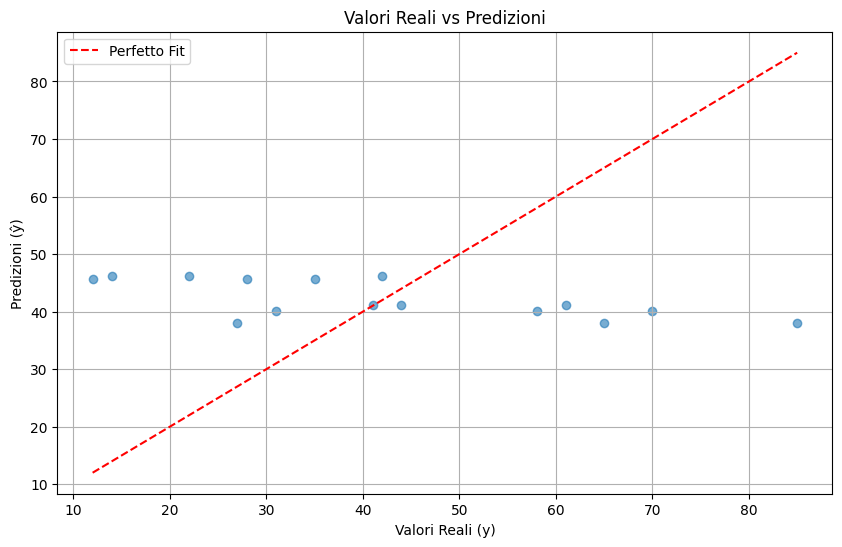

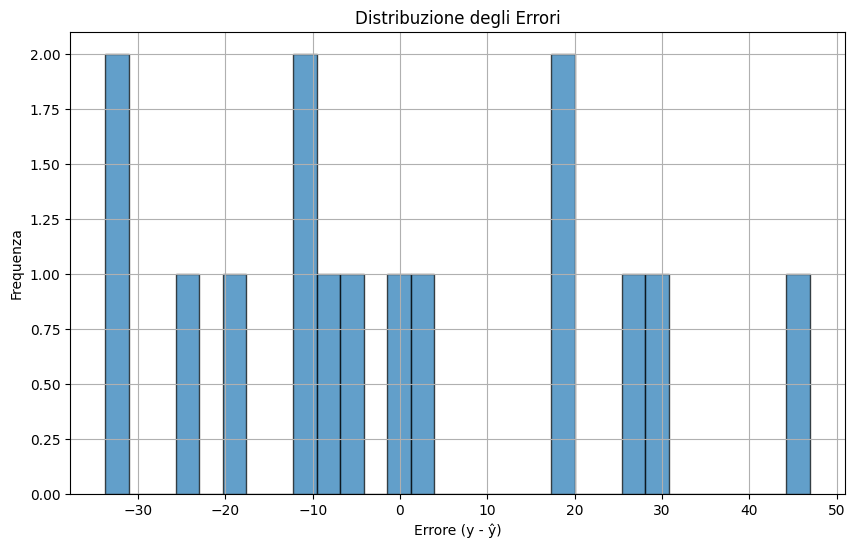

Mean Squared Error (MSE): 530.8371966666666
mean_absolute_percentage_error: 0.6705620458824735


In [869]:
errors = y - y_pred_cval

# Grafico 1: Valori reali vs Predizioni
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_cval, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Perfetto Fit")  # Linea diagonale
plt.xlabel("Valori Reali (y)")
plt.ylabel("Predizioni (ŷ)")
plt.title("Valori Reali vs Predizioni")
plt.legend()
plt.grid()
plt.show()

# Grafico 2: Istogramma degli Errori
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, alpha=0.7, edgecolor="k")
plt.xlabel("Errore (y - ŷ)")
plt.ylabel("Frequenza")
plt.title("Distribuzione degli Errori")
plt.grid()
plt.show()

# Optional: MSE
mse = mean_squared_error(y, y_pred_cval)
pmse = mean_absolute_percentage_error(y, y_pred_cval)
print(f"Mean Squared Error (MSE): {mse}")
print(f"mean_absolute_percentage_error: {pmse}")

In [870]:
import joblib

In [871]:
joblib.dump(pipe, "pipe_esercizio.pkl")

['pipe_esercizio.pkl']

In [872]:
model_load = joblib.load("pipe_esercizio.pkl")

In [873]:
model_load

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Satisfaction_Level',
                                                   'Region', 'Customer_Type',
                                                   'Category',
                                                   'Feature_G'])])),
                ('scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=2,
                                       min_samples_split=15))])

In [874]:
data

,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E,Category,Feature_F,Feature_G,Feature_H,Customer_Type,Region,Satisfaction_Level,Outcome
0,61.0,105.0,56.0,80.0,130.0,Category_1,100.0,No,0.20,New,West,High,22
1,24.0,105.0,56.0,54.0,84.0,Category_1,100.0,no,0.30,VIP,South,High,14
2,81.0,105.0,56.0,104.0,276.0,Category_2,400.0,no,0.10,Returning,South,High,42
3,24.0,105.0,56.0,366.0,228.0,Category_2,250.0,yes,0.50,Returning,South,Medium,28
4,24.0,83.0,56.0,383.0,180.0,Category_2,100.0,no,0.10,New,East,High,35
5,24.0,150.0,56.0,80.0,160.0,Category_3,300.0,Yes,0.10,Returning,East,High,12
6,97.0,105.0,56.0,80.0,140.0,Category_2,300.0,no,0.30,Returning,West,High,31
7,24.0,40.0,56.0,80.0,120.0,Category_3,100.0,Yes,0.10,VIP,West,High,70
8,31.0,95.5,56.0,80.0,120.0,Category_1,200.0,no,0.20,VIP,North,Low,58
9,45.0,151.0,56.0,80.0,105.5,Category_3,300.0,Yes,0.20,VIP,North,Low,85


In [875]:
data.columns

Index(['Feature_A', 'Feature_B', 'Feature_C', 'Feature_D', 'Feature_E',
       'Category', 'Feature_F', 'Feature_G', 'Feature_H', 'Customer_Type',
       'Region', 'Satisfaction_Level', 'Outcome'],
      dtype='object')

In [876]:
inferenza = pd.DataFrame({
    'Feature_A':[1],
    "Feature_B":[2],
    "Feature_C":[16],
    "Feature_D":[11],
    "Feature_E":[135],
    "Category":["Category_1"],
    "Feature_F":[12],
    "Feature_G":["no"],
    "Feature_H":[23],
    "Customer_Type":["VIP"],
    "Region":["North"],
    "Satisfaction_Level":["ivbweilvgequ9gfoq"]
})

In [879]:
inferenza

,Feature_A,Feature_B,Feature_C,Feature_D,Feature_E,Category,Feature_F,Feature_G,Feature_H,Customer_Type,Region,Satisfaction_Level
0,1,2,16,11,135,Category_1,12,no,23,VIP,North,ivbweilvgequ9gfoq


In [880]:
predizione = model_load.predict(inferenza)
predizione[0]

41.77799999999999

## lambda function

In [ ]:
# moltiplica tutto per 2 e poi alla potenza di due, poi filtra quelli pari
numeri = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

numerix2 = map(lambda x: (x*2)**2, filter(lambda x: x % 2 == 0, numeri))
numerix2

In [ ]:
risultato_lista = list(numerix2)
risultato_lista

[16, 64, 144, 256, 400]

In [ ]:
# Problema:
# Hai una lista di dizionari che rappresentano persone, ognuna con un'età e un nome. Devi usare le lambda functions per:

# Filtrare solo le persone che hanno almeno 18 anni.
# Estrarre solo i nomi delle persone filtrate.
# Convertire i nomi delle persone filtrate in maiuscolo.

In [ ]:
persone = [
    {"nome": "Luca", "età": 17},
    {"nome": "Marco", "età": 21},
    {"nome": "Anna", "età": 15},
    {"nome": "Elisa", "età": 19},
    {"nome": "Sara", "età": 22}
]


In [ ]:
persone_grandi = list(map(lambda x: str.upper(x["nome"]), filter(lambda x: x["età"] >= 18, persone)))

In [ ]:
persone_grandi

['MARCO', 'ELISA', 'SARA']

In [ ]:
persone_grandi2 = list(map(lambda x: str.upper(x["nome"]) if isinstance(x, dict) and x["età"] >= 18 else np.nan, persone))
persone_grandi2 = [str.lower(i) for i in persone_grandi2 if i is not np.nan]

In [ ]:
persone_grandi2

['marco', 'elisa', 'sara']

In [ ]:
# Problema:
# Hai una lista di parole e devi:

# Filtrare solo le parole che iniziano con una lettera specifica (ad esempio, A o a).
# Trasformare le parole filtrate in maiuscolo.
# Ordinare le parole risultanti in ordine alfabetico.

In [ ]:
parole = ["albero", "mela", "arancia", "banana", "albicocca", "uva", "ananas", "lampone"]

parole = sorted(list(map(lambda x: str.upper(x), filter(lambda x: x[0] == "a" or x[0] == "A", parole))), reverse=False)
parole

['ALBERO', 'ALBICOCCA', 'ANANAS', 'ARANCIA']

In [ ]:
parole = sorted(
    list(
        map(
            lambda x: str.upper(x), filter(
                lambda x: x[0] == "a" or x[0] == "A", parole
            )
        )
    )
, reverse = True)
parole

['ARANCIA', 'ANANAS', 'ALBICOCCA', 'ALBERO']

In [ ]:
# Problema:
# Hai una lista di numeri interi e devi:

# Filtrare i numeri divisibili per 3.
# Moltiplicare i numeri filtrati per 10.
# Restituire i risultati in ordine decrescente.

In [ ]:
numeri = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 18, 20, 21]

numeri = sorted(list(map(lambda x: x ** 10, filter(lambda x: x % 3 == 0, numeri))), reverse = True)

numeri

[16679880978201,
 3570467226624,
 576650390625,
 61917364224,
 3486784401,
 60466176,
 59049]

In [ ]:
# Problema:
# Hai una lista di dizionari, ognuno rappresenta un prodotto con il suo nome, categoria e prezzo. Devi:

# Filtrare solo i prodotti appartenenti a una categoria specifica (esempio: "elettronica").
# Aumentare il prezzo di questi prodotti del 20%.
# Ordinare i prodotti filtrati per prezzo decrescente.
# Estrarre solo i nomi dei prodotti.


In [ ]:
prodotti = [
    {"nome": "Smartphone", "categoria": "elettronica", "prezzo": 699},
    {"nome": "Televisione", "categoria": "elettronica", "prezzo": 1199},
    {"nome": "Frigorifero", "categoria": "elettrodomestici", "prezzo": 899},
    {"nome": "Cuffie", "categoria": "elettronica", "prezzo": 149},
    {"nome": "Lavatrice", "categoria": "elettrodomestici", "prezzo": 499},
    {"nome": "Tablet", "categoria": "elettronica", "prezzo": 349},
]


prodotti = sorted(list(map(lambda x: x["prezzo"] + (x["prezzo"] * 0.20), filter(lambda x: x["categoria"] == "elettronica", prodotti))), reverse=True)

In [ ]:
prodotti

[1438.8, 838.8, 418.8, 178.8]